encryptage d'image sur les bit de plus grandes importances 

In [18]:
#image en niveau de gris, on modifie les niveau de gris grace a une xor 
#avec une clé aléatoire sur chacun des bit jusqu'au bit s de plus hautes importances. 

import random


def base2(n):
    """Convertit un entier n en une liste de bits (base 2)"""
    bits = [0]*8  # Initialise une liste de 8 bits à 0
    k=1
    while n > 0:
        bits[len(bits)-k] = n % 2  # Stocke le bit le plus à droite
        k+=1
        n //= 2
    return bits  # Retourne la liste dans l'ordre correct

def base10(bits):
    """Convertit une liste de bits (base 2) en un entier n"""
    n = 0
    for i in range(len(bits)):
        n += bits[len(bits)-1-i] * (2**i)  # Calcule la valeur décimale
    return n

In [19]:

def encryptage (image,s):
    random.seed(42)  # Pour reproductibilité des résultats
    image_encrypted = image.copy() 
    for i in range (len (image)):
        for j in range (len(image[0])):
            bits = base2(image[i][j])
            for p in range (0, s):
                k = random.randint(0, 1)
                bits[p] = bits[p] ^ k
            image_encrypted[i][j] = base10(bits)

    return image_encrypted
print("Test encryptage :")
print ([[34, 67, 123, 255],[34, 67, 123, 255]])
print(encryptage([[34, 67, 123, 255],[34, 67, 123, 255]], 3))

Test encryptage :
[[34, 67, 123, 255], [34, 67, 123, 255]]
[[2, 67, 91, 255], [34, 3, 187, 159]]


In [20]:
def decalage_bit_2D(img,s):
    # copie de l'image (liste ou tableau numpy)
    img_decale = img.copy()
    # clamp s entre 0 et 8
    s = max(0, min(int(s), 8))
    # itérer par index pour ne pas confondre valeur et position
    for idx in range(len(img)):
        for idx2 in range(len(img[0])):
            pixel = int(img[idx][idx2])
            bits = base2(pixel)
            # déplacer les bits : bits[j] <- bits[j + s] pour j in [0, 8-s)
            for j in range(0, 8 - s):
                bits[j] = bits[j + s]
            # remplir le reste par des zéros
            for j in range(8 - s, 8):
                bits[j] = 0
            img_decale[idx][idx2] = base10(bits)
    return img_decale
print("Test decalage_bit_2D :")
print([[34, 67], [123, 255]])
print(decalage_bit_2D([[34, 67], [123, 255]], 3))

Test decalage_bit_2D :
[[34, 67], [123, 255]]
[[16, 24], [216, 248]]


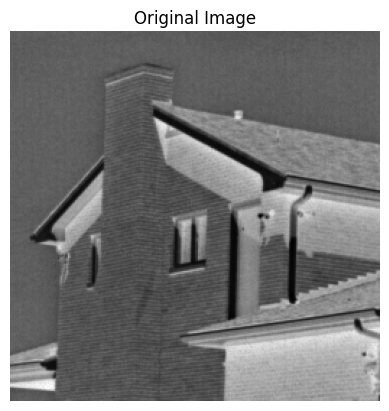

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
path_img = "PPM/House.256.ppm"
img = imread(path_img)
imggray = (img[:,:,0]*255).astype(int)  # Conversion en niveaux de gris
plt.imshow(imggray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

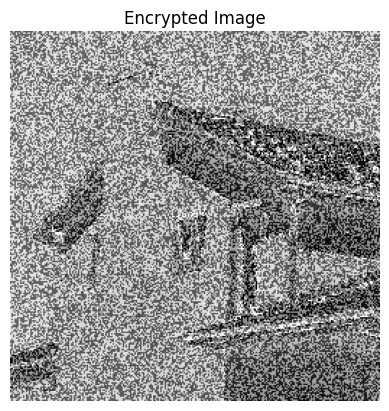

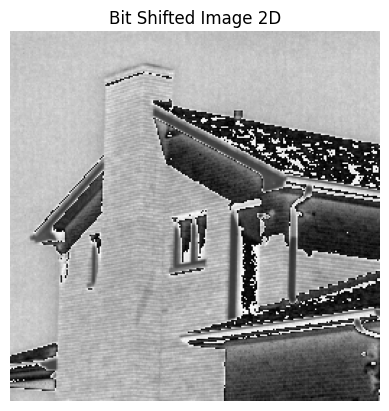

In [4]:

A= encryptage(imggray, 1)

plt.imshow(A, cmap='gray')
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

C = decalage_bit_2D(imggray, 1)
plt.imshow(C, cmap='gray')
plt.title("Bit Shifted Image 2D")
plt.axis('off')
plt.show()



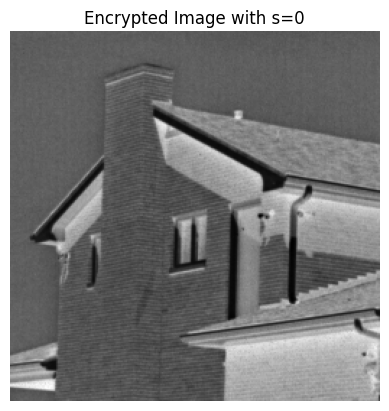

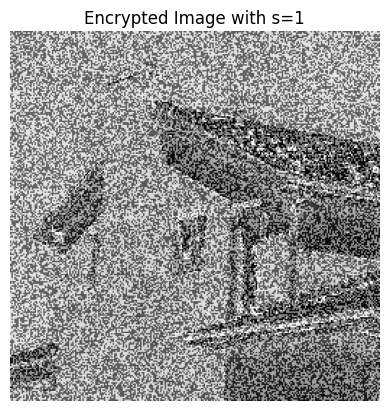

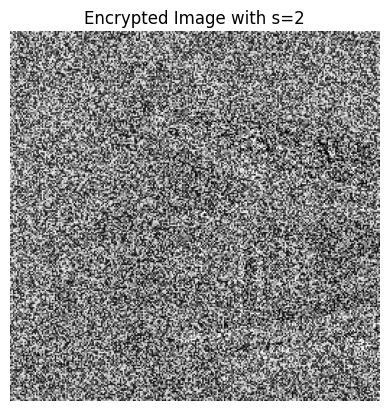

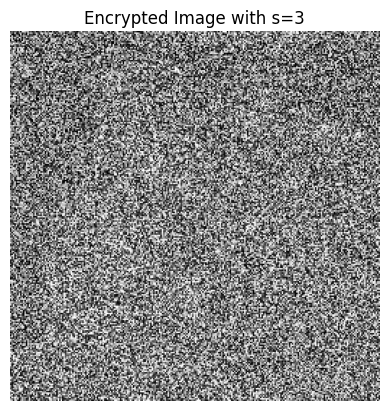

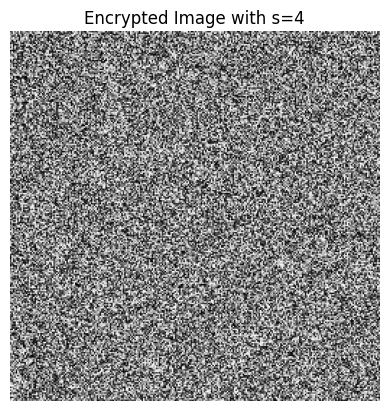

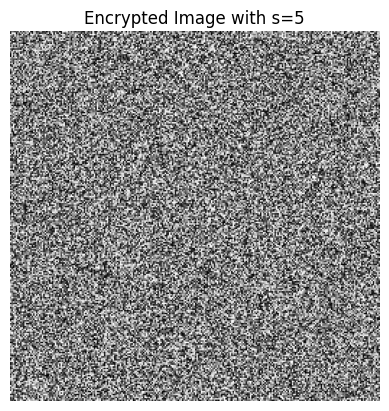

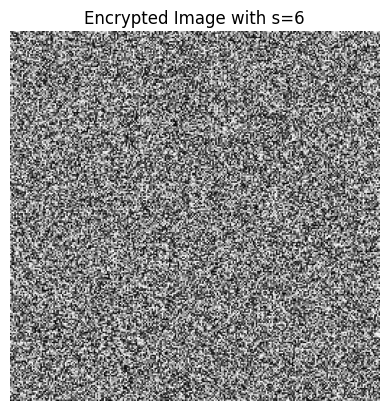

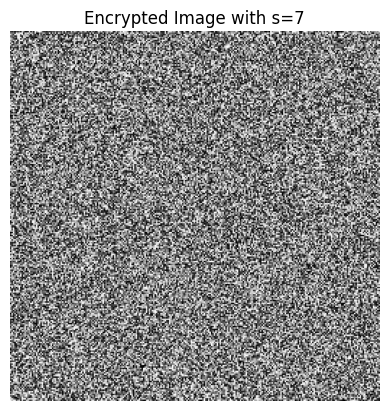

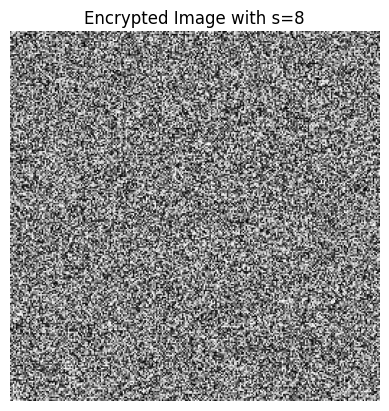

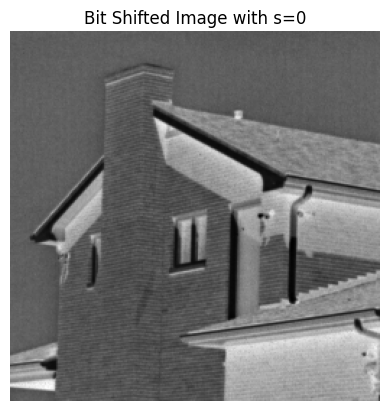

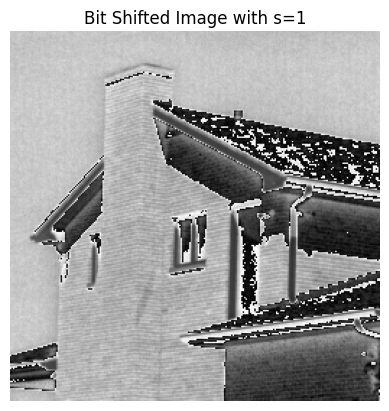

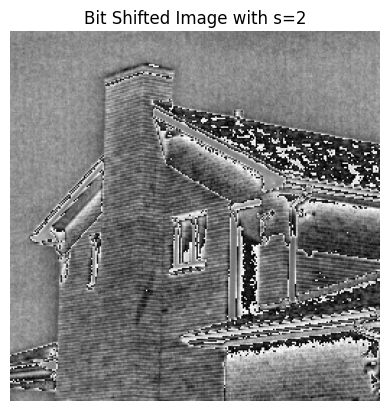

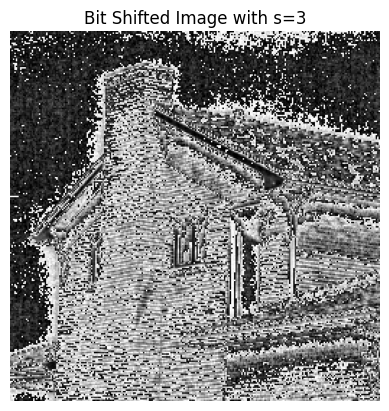

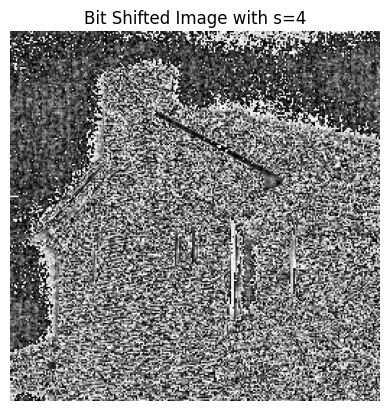

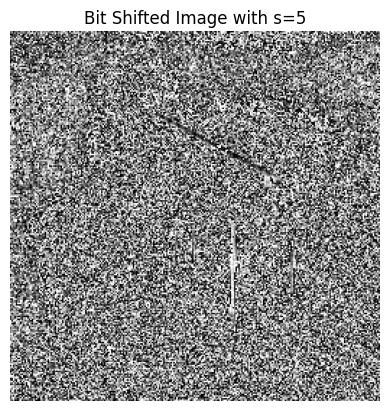

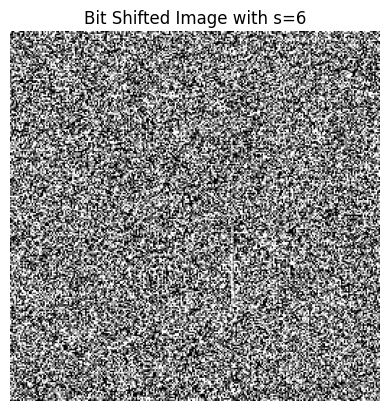

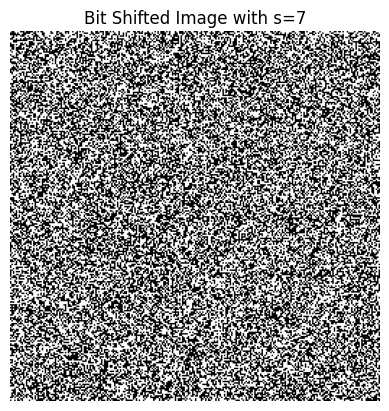

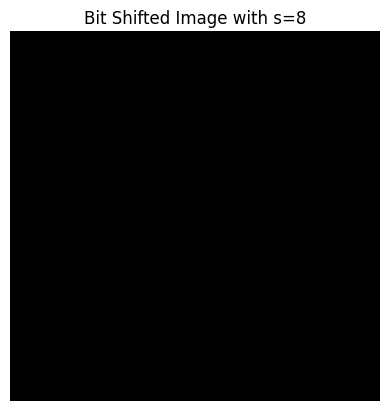

In [5]:
S=[i for i in range(0,9)]
for s in S : 
    A= encryptage(imggray, s)
    plt.imshow(A, cmap='gray')
    plt.title(f"Encrypted Image with s={s}")
    plt.axis('off')
    plt.show()

for s in S : 
    C=decalage_bit_2D(imggray, s)
    plt.imshow(C, cmap='gray')
    plt.title(f"Bit Shifted Image with s={s}")
    plt.axis('off')
    plt.show()



    

information mutuelle avec histogramme 

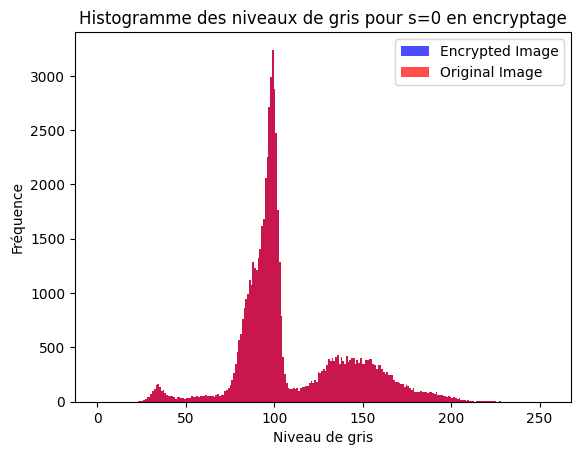

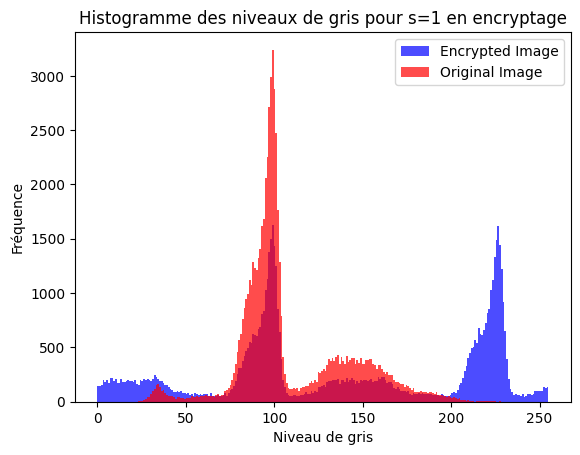

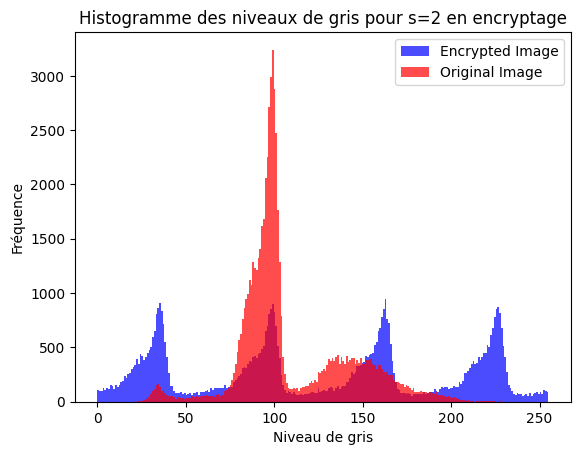

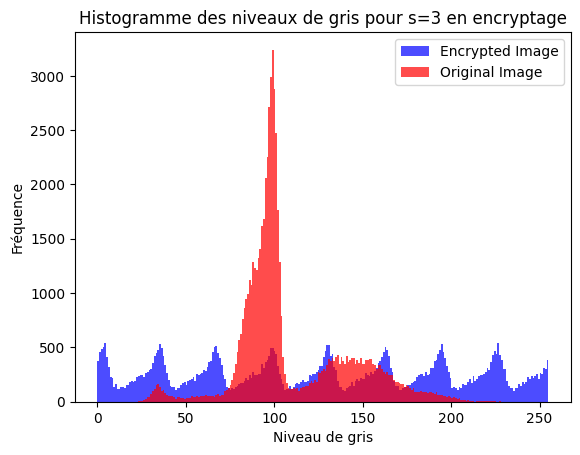

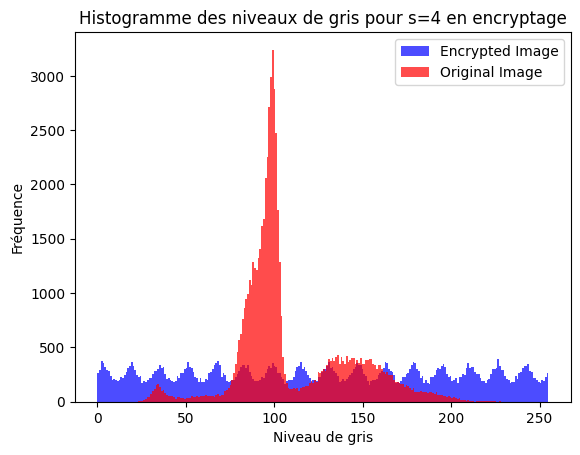

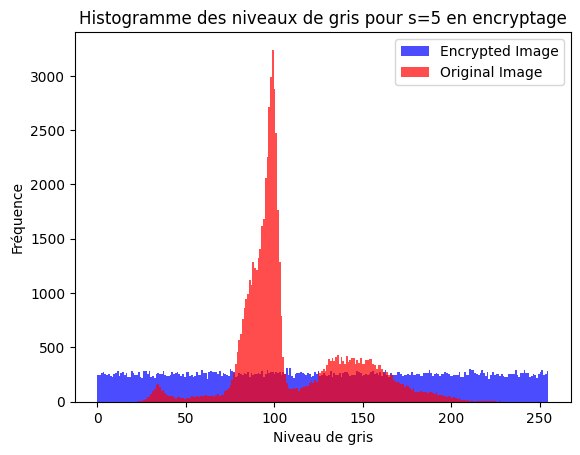

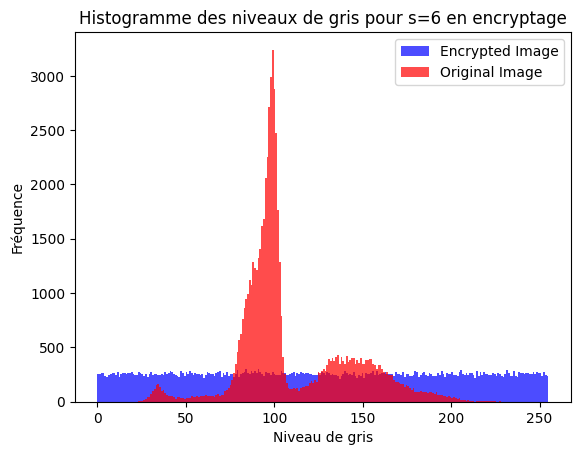

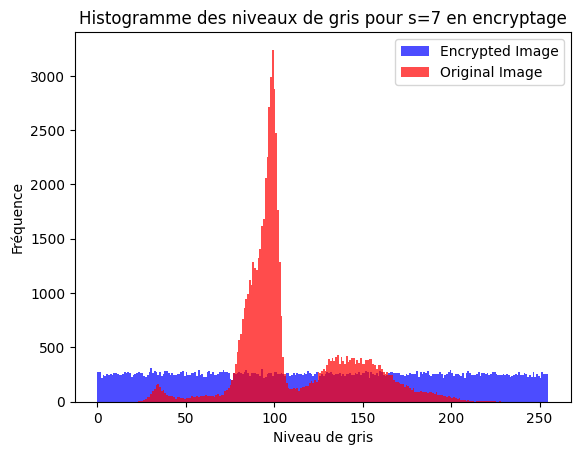

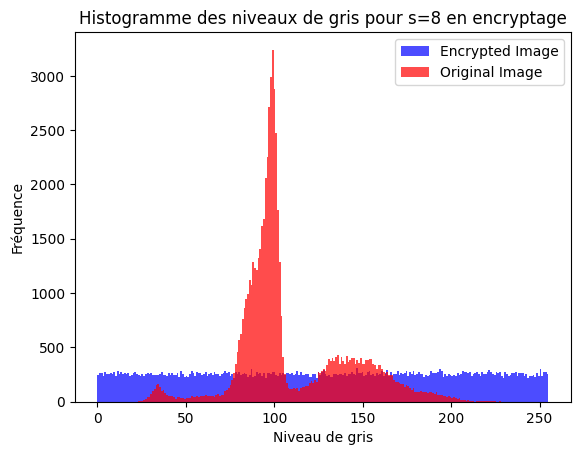

In [6]:
#distribution des niveaxu de gris de image originale et encryptée pour s=0,1,2,...8
for s in S : 
    A= encryptage(imggray, s)
    plt.hist(A.flatten(), bins=256, range=(0,255), alpha=0.7, color='blue', label='Encrypted Image')
    plt.hist(imggray.flatten(), bins=256, range=(0,255), alpha=0.7, color='red', label='Original Image')
    plt.title(f"Histogramme des niveaux de gris pour s={s} en encryptage")
    plt.xlabel("Niveau de gris")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()


modifier les bits de plus grandes importances décale les couleurs vers les puissances de 2 

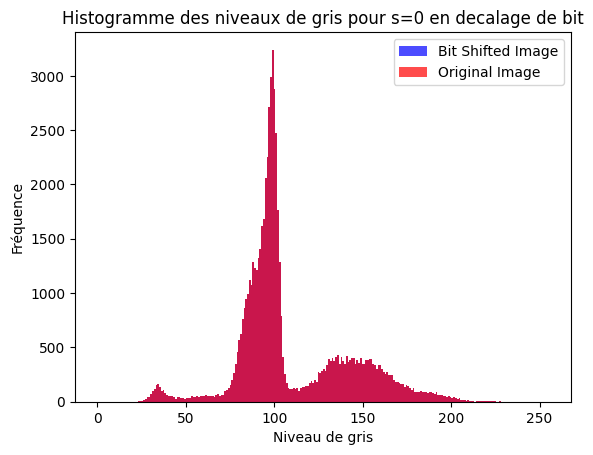

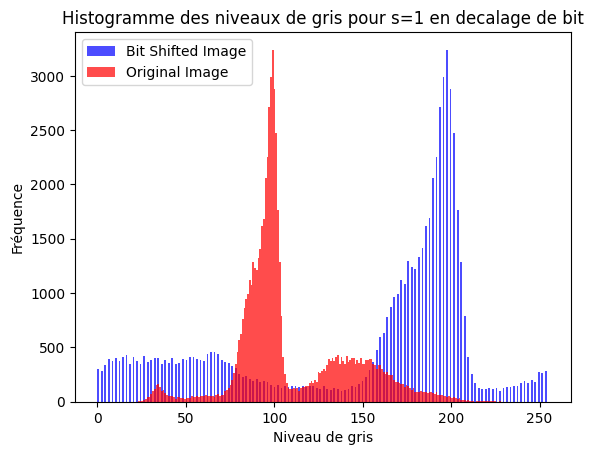

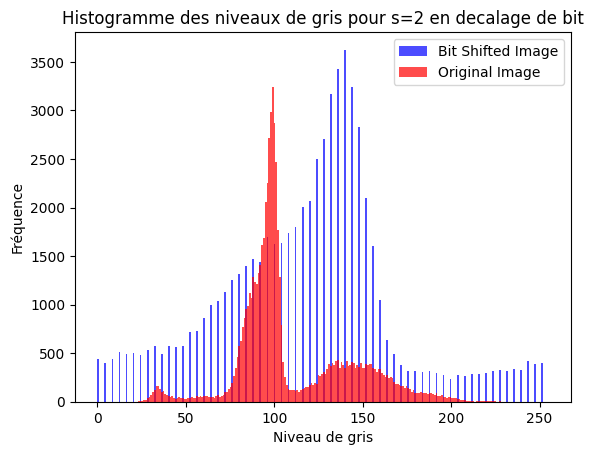

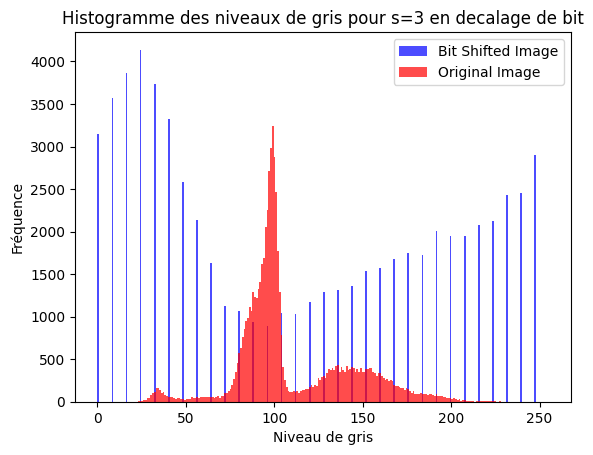

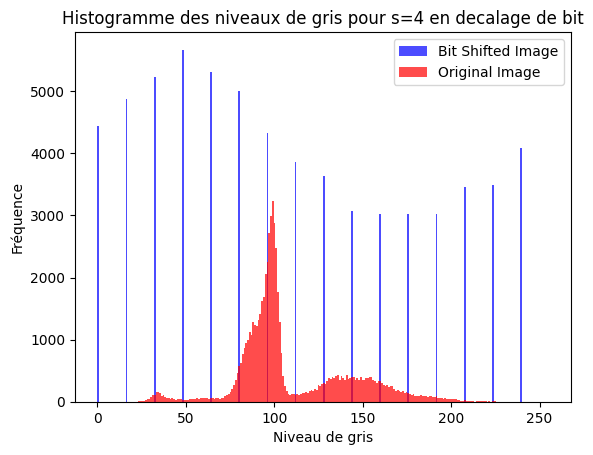

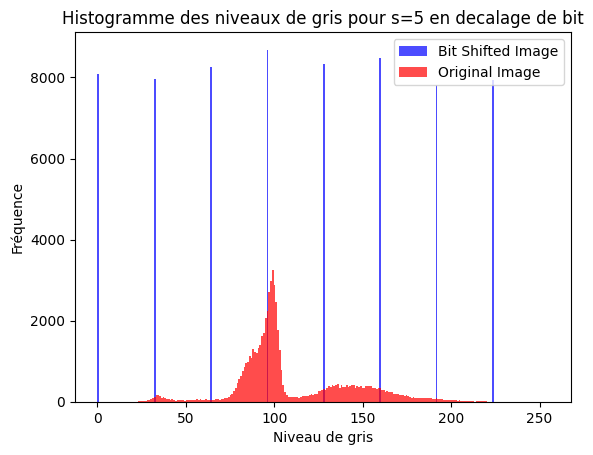

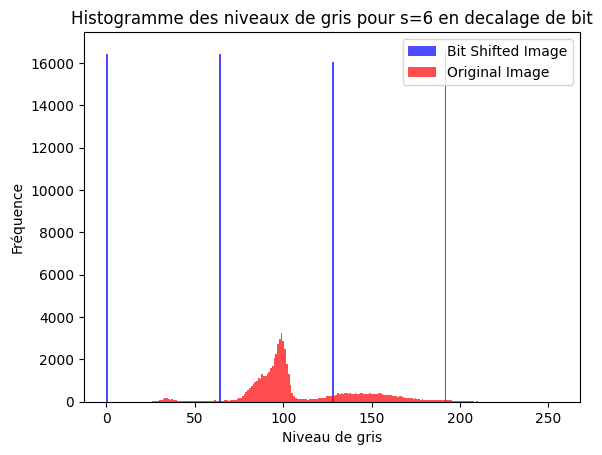

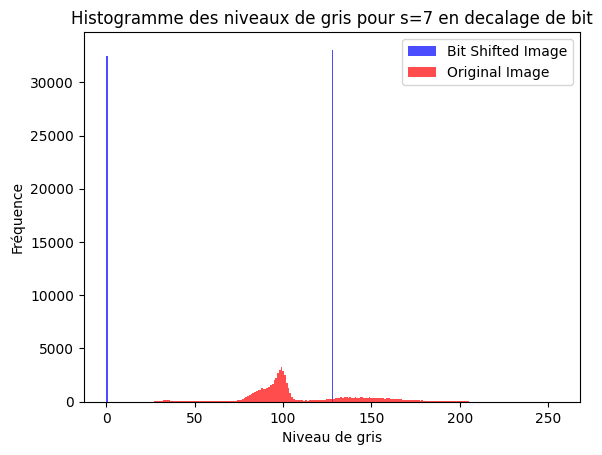

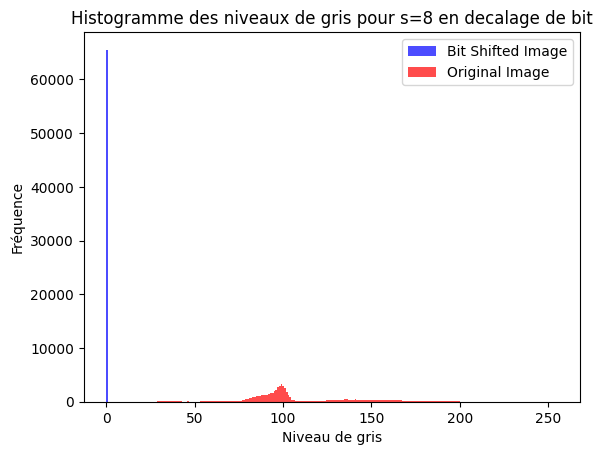

In [7]:
#histogramme des niveaux de gris pour l'image avec decalage de bit
for s in S : 
    B = decalage_bit_2D(imggray, s)
    plt.hist(B.flatten(), bins=256, range=(0,255), alpha=0.7, color='blue', label='Bit Shifted Image')
    plt.hist(imggray.flatten(), bins=256, range=(0,255), alpha=0.7, color='red', label='Original Image')
    plt.title(f"Histogramme des niveaux de gris pour s={s} en decalage de bit")
    plt.xlabel("Niveau de gris")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

décaler les bits de plus grande simportances illustrent leurs importances : couleurs tres foncée devient d'un coup tres claire : 
la difference de l'histogramme bleu entre s=1 et s=2 prouve le comportement non linéaire de l'information dans une image

In [8]:
#Mutual Information entre l'image originale et l'image encryptée pour s=1,2,...8
#les distributions de X et Y sont obtenues à partir des histogrammes des niveaux de gris
import numpy as np
def hist2d(x, y, bins):
    """Calcule l'histogramme 2D normalisé de x et y"""
    hist, _, _ = np.histogram2d(x, y, bins=bins)
    hist = hist / np.sum(hist)  # Normalisation pour obtenir une distribution de probabilité
    return hist
def hist1d(x, bins):
    """Calcule l'histogramme 1D normalisé de x"""
    hist, _ = np.histogram(x, bins=bins)
    hist = hist / np.sum(hist)  # Normalisation pour obtenir une distribution de probabilité
    return hist

In [9]:
#MI = KL(P(X,Y)||P(X)P(Y)) = sum(p(i,j)Log(p(i,j)/p(i)p(j)))
#p(i)= ni/N ou N est le nombre de pixel
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]

for s in S :
    x =  imggray.flatten()
    y =  decalage_bit_2D(imggray, s).flatten()
    z = encryptage(imggray, s).flatten()

    distrib_x = hist1d(x, bins=256) # Distribution marginale de X
    distrib_y = hist1d(y,  bins=256)  # Distribution marginale de Y
    distrib_z = hist1d(z, bins=256) # Distribution marginale de Z

    jointdistib_dec = hist2d(x, y, bins=256)  
    jointdistib_enc = hist2d(x, z, bins=256)

    h_x = 0
    MI_enc=0
    MI_dec=0
    N = len(imggray)*len(imggray[0]) #nombre total de pixels
    for i in range(256):
        h_x += - (distrib_x[i]/N) * np.log(distrib_x[i]/N) if distrib_x[i] > 0 else 0 #entropie de X si px(i)>0, division par N pour obtenir probabilité
        for j in range(256):
            if jointdistib_dec[i][j] > 0 and distrib_x[i] > 0 and distrib_y[j] > 0: 
                    pxy = jointdistib_dec[i][j]/N
                    px = distrib_x[i]/N
                    py = distrib_y[j]/N
                    MI_dec+= pxy * np.log(pxy/(px*py))
            if jointdistib_enc[i][j] > 0 and distrib_x[i] > 0 and distrib_z[j] > 0: 
                    pxz = jointdistib_enc[i][j]/N
                    px = distrib_x[i]/N
                    pz = distrib_z[j]/N
                    MI_enc+= pxz * np.log(pxz/(px*pz))
            
    mi_encrypt.append(MI_enc)
    mi_decalage.append(MI_dec)
print(h_x)

0.00023724437284334505


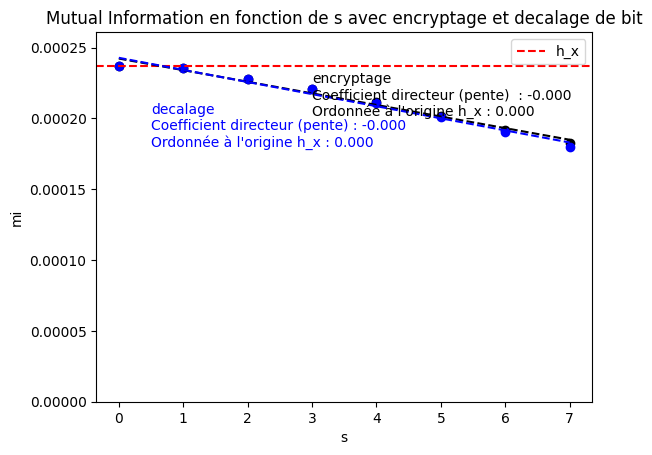

In [10]:
fig, ax = plt.subplots()
ax.axhline(y=h_x, color='r', linestyle='--', label='h_x')

#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe

plt.text( 3, mi_encrypt[5], f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec encryptage et decalage de bit')
plt.legend(loc="upper right")
plt.show()

comportement linéaire désagréable 

In [11]:
from sklearn.metrics import mutual_info_score
def mutual_information(x, y):
    """Calcule l'information mutuelle entre deux variables x et y"""
    return mutual_info_score(x, y)


Mon code ne renvoie pas la valeur parfaite de la MI mais donne la bonne variation entre les points

In [12]:
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]
for s in S :
    x =  imggray.flatten()
    y =  encryptage(imggray, s).flatten()
    z= decalage_bit_2D(imggray, s).flatten()
    mi_decalage.append(mutual_information(x, z))
    mi_encrypt.append(mutual_information(x, y))

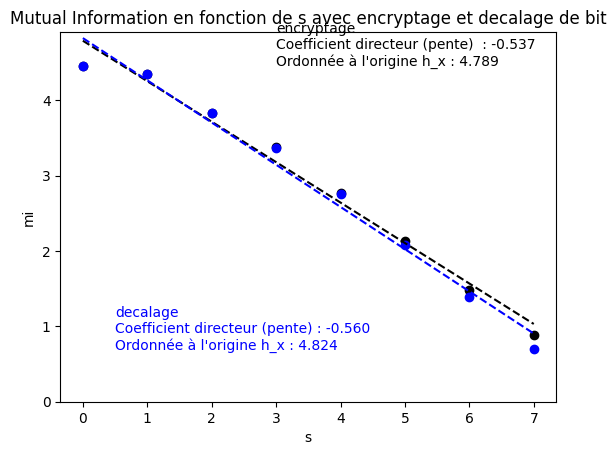

In [13]:

fig, ax = plt.subplots()
#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe
# ameliore la position du texte sur le grapphe :

plt.text( 3, mi_encrypt[0], f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec encryptage et decalage de bit')
plt.show()

Pour un encrptage différent la MI est très similaire

Je test la MI sur la distribution des pixels verticalement et horizontalement. Cela me permettrait de déterminer si les continuités sont respectees ou non
Une faible MI entre verticale et horizontale = bruit uniforme rajouté
Je m'attend a ce que le bit shift ait une plus grande MI que le encryptage

In [14]:
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]

for s in S :
    x =  imggray[125]
    y =  decalage_bit_2D(imggray, s)[125]
    z = encryptage(imggray, s)[125]

    distrib_x = hist1d(x, bins=256) # Distribution marginale de X
    distrib_y = hist1d(y,  bins=256)  # Distribution marginale de Y
    distrib_z = hist1d(z, bins=256) # Distribution marginale de Z

    jointdistib_dec = hist2d(x, y, bins=256)  
    jointdistib_enc = hist2d(x, z, bins=256)

    h_x = 0
    MI_enc=0
    MI_dec=0
    N = len(imggray)*len(imggray[0]) #nombre total de pixels
    for i in range(256):
        h_x += - (distrib_x[i]/N) * np.log(distrib_x[i]/N) if distrib_x[i] > 0 else 0 #entropie de X si px(i)>0, division par N pour obtenir probabilité
        for j in range(256):
            if jointdistib_dec[i][j] > 0 and distrib_x[i] > 0 and distrib_y[j] > 0: 
                    pxy = jointdistib_dec[i][j]/N
                    px = distrib_x[i]/N
                    py = distrib_y[j]/N
                    MI_dec+= pxy * np.log(pxy/(px*py))
            if jointdistib_enc[i][j] > 0 and distrib_x[i] > 0 and distrib_z[j] > 0: 
                    pxz = jointdistib_enc[i][j]/N
                    px = distrib_x[i]/N
                    pz = distrib_z[j]/N
                    MI_enc+= pxz * np.log(pxz/(px*pz))
            
    mi_encrypt.append(MI_enc)
    mi_decalage.append(MI_dec)
print(h_x)

0.00023459257789856702


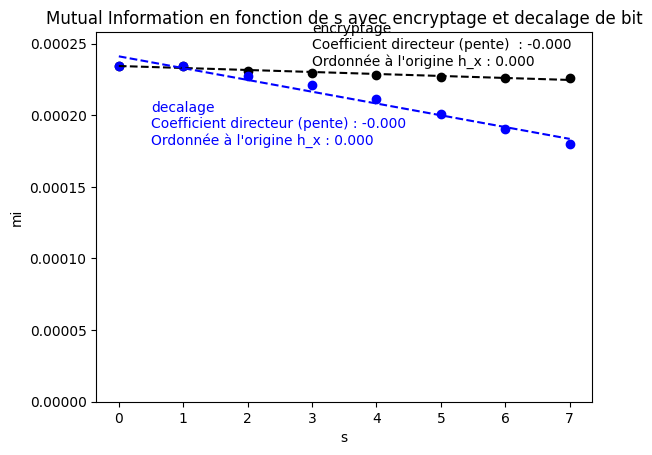

In [15]:
fig, ax = plt.subplots()

#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe

plt.text( 3, mi_encrypt[0], f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec encryptage et decalage de bit')
plt.show()

In [16]:
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]
for s in S :
    x =  imggray[125]
    y =  encryptage(imggray, s)[125]
    z= decalage_bit_2D(imggray, s)[125]
    mi_decalage.append(mutual_information(x, z))
    mi_encrypt.append(mutual_information(x, y))


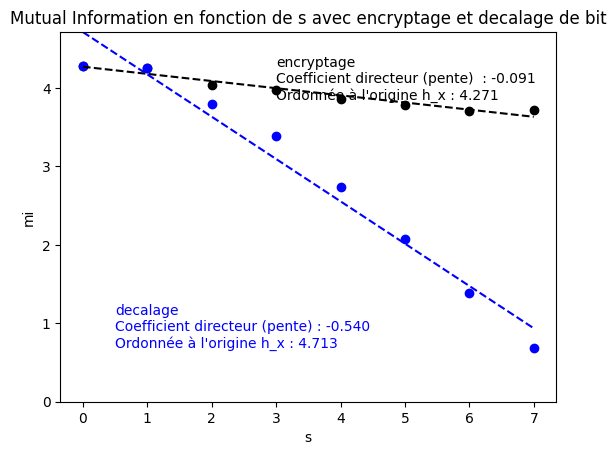

In [17]:

fig, ax = plt.subplots()
#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe
# ameliore la position du texte sur le grapphe :

plt.text( 3, mi_encrypt[0]*0.9, f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec encryptage et decalage de bit')
plt.show()

il y a des zones de mutuelles informations fortes et d'autres faibles

J'ai donc appliqué le fait que MI est invariant pour f bijective 